In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'y')

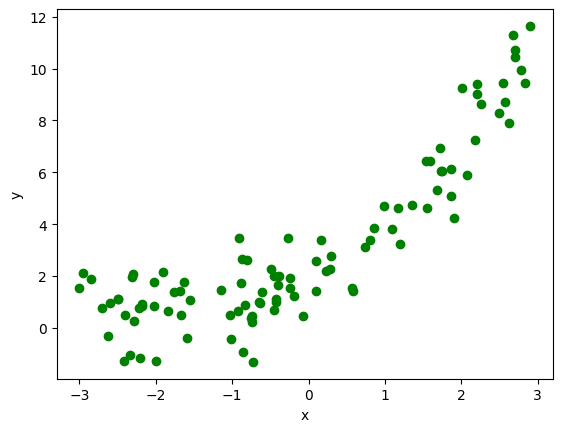

In [ ]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2 + 1.5*x +2 + np.random.randn(100,1)
#quadratic equation used y=0.5x^2+1.5*x +2 + outliers
plt.scatter(x,y,color='g')
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
#

In [ ]:
##Lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Coefficient or slope:",regression.coef_ )  #B1
print("Intercept:",regression.intercept_ )

Coefficient or slope: [[1.5990466]]
Intercept: [3.36133695]


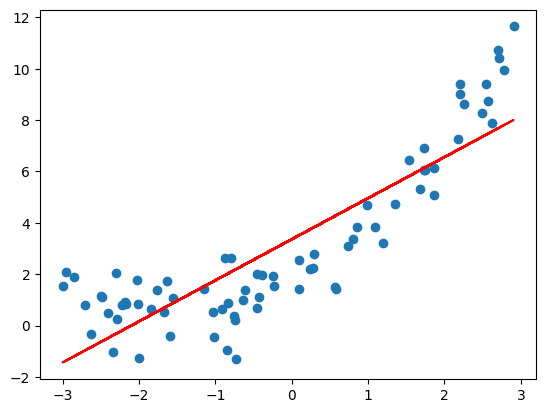

In [ ]:
##plot training data plot just to check
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color='red')

In [ ]:
from sklearn.metrics import r2_score
sscore=r2_score(y_test,regression.predict(x_test))
print(sscore) ##veryoff score

0.729705357098926


now we will che
ck for higher polynomial degree


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

h(x)=b0*1+b1*x+b2*x^2
the array will contain 1, x , x^2

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=True) #so that we have 1 also
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [ ]:
x_train_poly

array([[ 1.        , -0.72546797,  0.52630377],
       [ 1.        ,  1.19439387,  1.42657672],
       [ 1.        , -2.62750948,  6.90380609],
       [ 1.        ,  0.28156813,  0.07928061],
       [ 1.        ,  1.0966319 ,  1.20260152],
       [ 1.        , -0.85287743,  0.7273999 ],
       [ 1.        , -2.8459218 ,  8.09927089],
       [ 1.        ,  1.72696035,  2.98239205],
       [ 1.        ,  0.85796278,  0.73610013],
       [ 1.        , -1.63564939,  2.67534892],
       [ 1.        , -0.74080544,  0.54879269],
       [ 1.        ,  0.09723373,  0.0094544 ],
       [ 1.        ,  0.56504033,  0.31927058],
       [ 1.        , -2.1738375 ,  4.72556947],
       [ 1.        ,  2.54251446,  6.4643798 ],
       [ 1.        , -0.39118013,  0.15302189],
       [ 1.        ,  2.20936761,  4.88130524],
       [ 1.        , -2.70441071,  7.3138373 ],
       [ 1.        ,  0.98445689,  0.96915537],
       [ 1.        ,  1.53348175,  2.35156627],
       [ 1.        , -2.18417945,  4.770

In [ ]:
regress=LinearRegression()
regress.fit(x_train_poly,y_train)
y_pred=regress.predict(x_test_poly)
ssscore=r2_score(y_test,y_pred)
print(ssscore)


0.8024141620978439


In [ ]:
print(regress.coef_)

[[0.         1.61652617 0.52221525]]


In [ ]:
print(regress.intercept_)

[1.73441074]


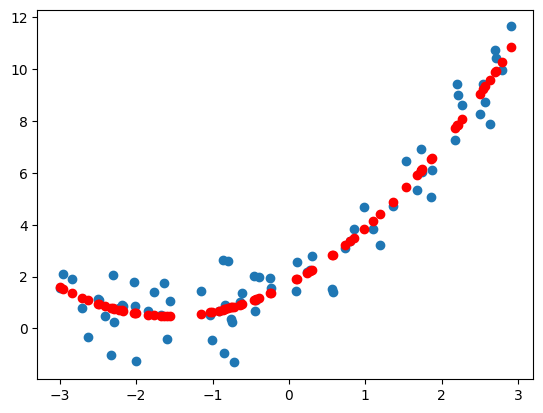

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regress.predict(x_train_poly),color='red')

In [ ]:
poly=PolynomialFeatures(degree=3,include_bias=True) #so that we have 1 also
x_train_poly3=poly.fit_transform(x_train)
x_test_poly3=poly.transform(x_test)

In [ ]:
regres=LinearRegression()
regres.fit(x_train_poly3,y_train)
y_pred=regres.predict(x_test_poly3)
sscore=r2_score(y_test,y_pred)
print(sscore)

0.8055270601316182


almost same accuracy

In [ ]:
#prediction of new data set
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
x_new_poly   #three features and 1 bias

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

Text(0, 0.5, 'y')

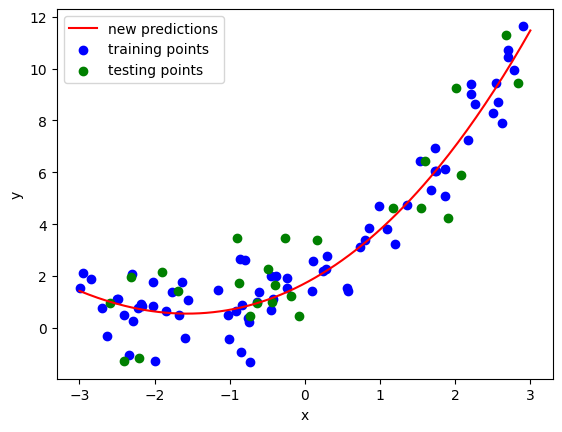

In [ ]:
y_new=regres.predict(x_new_poly)
plt.plot(x_new,y_new,color='red',label="new predictions")
plt.scatter(x_train,y_train,color="b",label="training points")
plt.scatter(x_test,y_test,color="g",label="testing points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

#PIPELINE CONCEPTS

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.metrics import r2_score
def poly_regression(degree):
  x_new=np.linspace(-3,3,200).reshape(200,1)

  poly_features=PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg=LinearRegression()
  pipeline=Pipeline([("poly_features",poly_features),("lin_reg",lin_reg)])
  pipeline.fit(x_train,y_train)
  y_pred_new=pipeline.predict(x_new)
  #plotting prediction line


  plt.plot(x_new,y_pred_new,color='red',label="Degree" + str(degree))
  plt.plot(x_train,y_train,'b.')
  plt.plot(x_test,y_test,"g.")
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.axis([-4,4,0,10])
  plt.show()

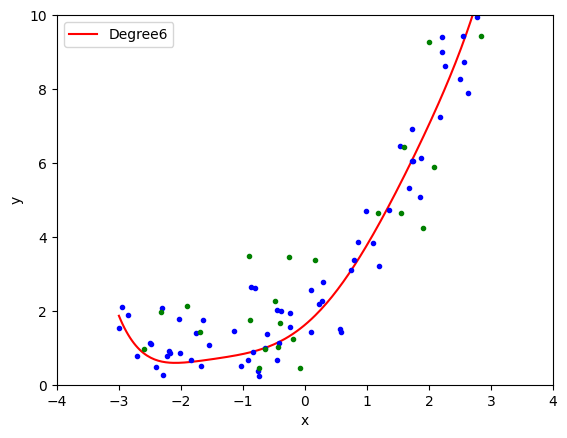

In [ ]:
poly_regression(6)